In [2]:
from ngsolve import *
from netgen.meshing import *
import math
import sys
"""
sys.path.append('..\include')
from MatrixSolver import MatrixSolver as solver 
"""
sys.path.append(r'..\bin\Release') 
from EMPY_Field import *
from ngsolve.webgui import Draw
from Models import SphereMesh
coil=UNIF(0,0,1,0)

from A_ReducedA import A_ReducedA_Method
from Omega_ReducedOmega import Omega_ReducedOmega_Method
from A_ReducedOmega import A_ReducedOmega_Method

model=SphereMesh(mur=1000, curveOrder=3, msize=meshsize.fine, ndiv=4)
model.Print()
mesh=model.mesh
Draw(mesh)

nv= 1457  nedge= 9459  nfacet= 15789  ne= 7786
Model: Spere mur= 1000 curveOrder= 3
nv= 1457  nedge= 9459  nfacet= 15789  ne= 7786
name: iron   mass: 4.18879020478639   center: (-9.48928e-17, -7.80626e-17, 1.05059e-16)
name: A_domain   mass: 3.049439269084493   center: (-4.34475e-17, -1.61682e-32, 3.24312e-16)
name: Omega_domain   mass: 516.3605461244282   center: (-2.16666e-16, -3.44955e-16, -2.42091e-16)


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

BaseWebGuiScene

enter iccg_solve
Dof= 36164    Nonzeros= 1718140
shift parameter= 1.0
minimum residual= 1.6370741881982481e-18  at iteraions:  83


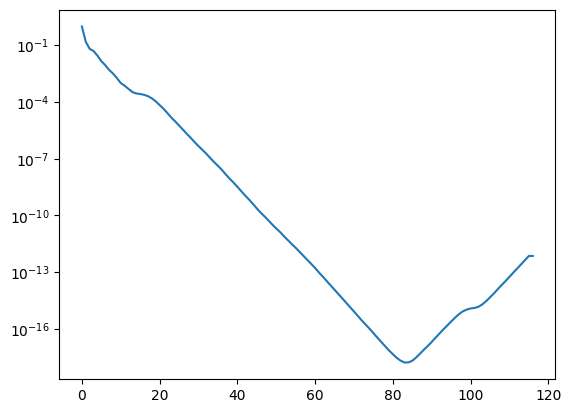

ICCG calculation time (sec): 0.5855784000013955
feOrder= 3    ndof= 36164   
center magnetic field =  (1.0315429688515974e-06, 2.8305790384250564e-06, 2.9470889531420035)   
magnetic energy= 28951.510328061446   
**** B field ****


WebGuiWidget(layout=Layout(height='50vh', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.24…

経過時間: 1.9268 秒  


In [4]:
feOrder=3
Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [3]:
#feOrder=2
#A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [4]:
"""
ndiv=3
ndiv=2**ndiv
model=CubeMesh(mur=1000, msize=meshsize.very_coarse, ndiv=ndiv, type=1)
for feOrder in range(1,2):
    A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")
"""

'\nndiv=3\nndiv=2**ndiv\nmodel=CubeMesh(mur=1000, msize=meshsize.very_coarse, ndiv=ndiv, type=1)\nfor feOrder in range(1,2):\n    A_ReducedA_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")\n'

ICCG calculation time (sec): 0.4919025999988662
feOrder= 1    ndof= 100942   
center magnetic field =  (0.0, 0.0, 3.4921274286450124)   
magnetic energy= 12459.505467618646 

ICCG calculation time (sec): 0.04952410000259988
feOrder= 1    ndof= 15486   
center magnetic field =  (2.9709247960543865e-16, -3.0368127399410497e-16, 3.3953507197559536)   
magnetic energy= 10728.858325722651 

In [5]:

feOrder=1
for ndiv in range(4,5):
    ndiv=2**ndiv
    model=CubeMesh(mur=1000, ndiv=ndiv)
    Draw(model.mesh)
    model.Print()
    A_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")


NameError: name 'CubeMesh' is not defined

feOrder=5
k= 0   Wm= 11432.890765134869
k= 1   Wm= 11438.036963840852
k= 2   Wm= 11438.036963840852
k= 3   Wm= 11438.471003353945
k= 4   Wm= 11438.471003353945
k= 5   Wm= 11438.471003353898
k= 6   Wm= 11438.471003353898
k= 7   Wm= 11438.471003353901
k= 8   Wm= 11438.471003353901
k= 9   Wm= 11438.471003353705
k= 10   Wm= 11438.471003353705
magnetic energy= 11432.890765134869

feOrder=6
k= 0   Wm= 11464.073724724947
k= 1   Wm= 11475.463653265768
k= 2   Wm= 11475.463653265768
k= 3   Wm= 11476.310128967762
k= 4   Wm= 11476.310128967762
k= 5   Wm= 11476.508350197375
k= 6   Wm= 11476.508350197375
k= 7   Wm= 11476.508350197377
k= 8   Wm= 11476.508350197377
k= 9   Wm= 11476.508350197171
k= 10   Wm= 11476.508350197171
magnetic energy= 11464.073724724947

In [ ]:
#for feOrder in range(1,9):
#    Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [ ]:
#Omega_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [ ]:
#A_ReducedOmega_Method(model, coil, feOrder=feOrder, boundaryCD="Bn0")

In [ ]:
        """
        with TaskManager():
        a.Assemble()
        gf=GridFunction(fes)
        gf.vec.data += a.mat.Inverse(freedofs=fes.FreeDofs()) * f.vec
        """

In [ ]:
        """
        a += 1e-8/mua*A*N*dx("iron")+1e-8/mu0*A*N*dx("A_domain")
        c = Preconditioner(a, "bddc")
        #c = Preconditioner(a, "local")
        with TaskManager():
            a.Assemble()
        gf = GridFunction(fes)
        solver = GMRESSolver(a.mat, pre=c.mat)
        with TaskManager():
            solvers.CG(sol=gf.vec, rhs=f.vec, mat=a.mat, pre=c.mat, printrates=True)
        """

In [ ]:
"""
print("nv=", mesh.nv, " nedge=", mesh.nedge, " nfacet=", mesh.nfacet, " ne=",mesh.ne)
print(mesh.GetMaterials())
for v in mesh.vertices:
    print( v.nr, v.point)
for ed in mesh.edges:
    print(ed, ed.vertices)
for el in mesh.Elements():
    print( el.nr, el.mat, el.vertices, el.edges, el.faces)

print("ndof=", fes.ndof)
print(fes.FreeDofs())
for el in mesh.Elements():
    print(fes.GetDofNrs(el))
"""

"""
print("ndof=", fesA.ndof)
print(fesA.FreeDofs())
for el in mesh.Elements():
    print(fesA.GetDofNrs(el))

print("ndof=", fesOmega.ndof)
print(fesOmega.FreeDofs())
for el in mesh.Elements():
    print(fesOmega.GetDofNrs(el))

from ngsolve.webgui import Draw
gf = GridFunction(fesA)
print("dof=", fesA.ndof)
for n in range(fesA.ndof):
    gf.vec.FV()[n]= 0
#print([m])
gf.vec.FV()[10]= 1
Draw (gf)
"""

meshsize.coarse

feOrder= 1   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 2535   
center magnetic field =  (0.0, 0.13648550675761853, 3.8822326063047488)   
magnetic energy= 12575.928132032475   
経過時間: 10.6726 秒  
enter iccg_solve
Dof= 1126  Nonzeros= 16010  symmetric matrix size= 8568.0
shift parameter= 1.0
minimum residual= 4.023818902577089e-13  at iteraions:  48

feOrder= 2   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 7058   
center magnetic field =  (0.0, -0.07448297716955096, 3.441529057512686)   
magnetic energy= 12129.622568449831   
経過時間: 4.1067 秒 
enter iccg_solve
Dof= 5279  Nonzeros= 135587  symmetric matrix size= 70433.0
shift parameter= 1.0
minimum residual= 1.0590739344522164e-12  at iteraions:  187

feOrder= 3   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 17235   
center magnetic field =  (0.0, -0.00577938933757507, 3.5583735344109964)   
magnetic energy= 12245.624515698084   
経過時間: 3.8810 秒 
enter iccg_solve
Dof= 14886  Nonzeros= 675891  symmetric matrix size= 345388.5
shift parameter= 1.0
minimum residual= 1.3969153168293444e-12  at iteraions:  277

feOrder= 6   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 104490   
center magnetic field =  (0.0, 7.769305790574445e-06, 3.566723363269401)   
magnetic energy= 12342.56448263178   
経過時間: 51.8855 秒  
enter iccg_solve
Dof= 99231  Nonzeros= 16638504  symmetric matrix size= 8368867.5
shift parameter= 1.0
minimum residual= 2.165483052807027e-12  at iteraions:  734

a.mat.Inverse
feOrder= 6   
nv= 384  nedge= 2151  nfacet= 3328  ne= 1560
ndof= 104490   
center magnetic field =  (0.0, 7.755773891963375e-06, 3.566723375220046)   
magnetic energy= 12342.564485475083   
経過時間: 18.8254 秒  
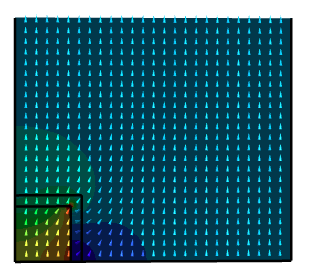

meshsize.fine

feOrder= 1   
enter iccg_solve
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.5973786148289246)   
magnetic energy= 12179.921019624098   
経過時間: 1.8049 秒  
Dof= 8882  Nonzeros= 134846  symmetric matrix size= 71864.0
shift parameter= 1.06
minimum residual= 4.870886337406865e-13  at iteraions:  84

enter iccg_solve
feOrder= 5   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 520775   
center magnetic field =  (-1.0032272515336623e-39, 9.643647873364105e-40, 3.567305166599915)   
magnetic energy= 12360.950080273635   
経過時間: 79.0045 秒
 magnetic energy= 12360.950080273635   
経過時間: 79.0045 秒  
Dof= 497688  Nonzeros= 59831900  symmetric matrix size= 30164794.0
shift parameter= 1.06
minimum residual= 4.376304864760951e-12  at iteraions:  230

feOrder= 6   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 860260   
center magnetic field =  (1.6252957936518763e-40, -1.5623359812123905e-40, 3.567553236498278)   
magnetic energy= 12366.42875120857   
経過時間: 256.1622 秒 
enter iccg_solve
Dof= 831522  Nonzeros= 145658402  symmetric matrix size= 73244962.0
shift parameter= 1.06
minimum residual= 1.1119254036259493e-11  at iteraions:  422

"bddc"
feOrder= 1   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.597378599442934)   
magnetic energy= 12179.920950620493   
経過時間: 3.1884 秒 
CG iteration 1, residual = 2071.2362470318703     
CG iteration 2, residual = 2.2422268129359974e-06     
CG iteration 3, residual = 8.870933401796136e-11   


a.mat.Inverse
feOrder= 1   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 19005   
center magnetic field =  (0.0, 0.0, 3.597378614826003)   
magnetic energy= 12179.921019622425   
経過時間: 3.2571 秒 

feOrder= 3   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 137542   
center magnetic field =  (-2.232454635139055e-37, 2.1459750382207594e-37, 3.5657416580228847)   
magnetic energy= 12326.599466477426   
経過時間: 10.1959 秒 

feOrder= 5   
nv= 2639  nedge= 16366  nfacet= 26618  ne= 12890
ndof= 520775   
center magnetic field =  (-1.0032113462227169e-39, 9.64349498156632e-40, 3.5673051665833153)   
magnetic energy= 12360.950080271783   
経過時間: 174.2252 秒  

feOrder= 6
NgException: PardisoInverse: Setup and Factorization failed